# Plot performance of physio syncing procedure

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
func_df = pd.read_table('/Users/tsalo/Documents/Laird_DIVA/sub-Blossom_synced_func.tsv')
physio_df = pd.read_table('/Users/tsalo/Documents/Laird_DIVA/sub-Blossom_updated_physio.tsv')
print(func_df.head())
print()
print(physio_df.head())

                                            filename  \
0  func/sub-Blossom_ses-02_task-strangerthings_ru...   
1  func/sub-Blossom_ses-02_task-strangerthings_ru...   
2  func/sub-Blossom_ses-02_task-strangerthings_ru...   
3  func/sub-Blossom_ses-02_task-strangerthings_ru...   
4  func/sub-Blossom_ses-02_task-strangerthings_ru...   

                     acq_time  duration      onset  phys_onset  index_onset  \
0  2020-05-12 17:06:21.052500     477.0     0.0000    428.2630       856526   
1  2020-05-12 17:27:05.957500     382.5  1244.9050   1673.1680      3346336   
2  2020-05-12 17:34:22.227500     550.5  1681.1750   2109.4380      4218876   
3  2020-05-12 17:44:42.757500     538.5  2301.7050   2729.9680      5459936   
4  2020-05-12 17:54:48.270000     450.0  2907.2175   3335.4805      6670961   

   index_duration  
0          954000  
1          765000  
2         1101000  
3         1077000  
4          900000  

       onset    index  duration
0   181.4695   362939  222.9965
1  

In [3]:
def plot_sync(scan_df, physio_df, onset_col):
    max_ = int(1000 * np.ceil(max((physio_df['onset'].max(), scan_df[onset_col].max())) / 1000))
    scalar = 10
    x = np.linspace(0, max_, (max_*scalar)+1)
    physio_timeseries = np.zeros(x.shape)
    func_timeseries = np.zeros(x.shape)
    for i, row in func_df.iterrows():
        func_timeseries[int(row[onset_col] * scalar):int((row[onset_col] + row['duration']) * scalar)] = 1

    for i, row in physio_df.iterrows():
        physio_timeseries[int(row['onset'] * scalar):int((row['onset'] + row['duration']) * scalar)] = 0.5

    fig, ax = plt.subplots(figsize=(20, 3))
    ax.fill_between(x, func_timeseries, where=func_timeseries>=0,
                    interpolate=True, color='red', alpha=0.3,
                    label='Functional scans')
    ax.fill_between(x, physio_timeseries, where=physio_timeseries>=0,
                    interpolate=True, color='blue', alpha=0.3,
                    label='Physio triggers')
    ax.set_xlim((min(x), max(x)))
    ax.set_ylim((0, None))
    ax.set_xlabel('Time (s)')
    ax.legend()
    return fig, ax

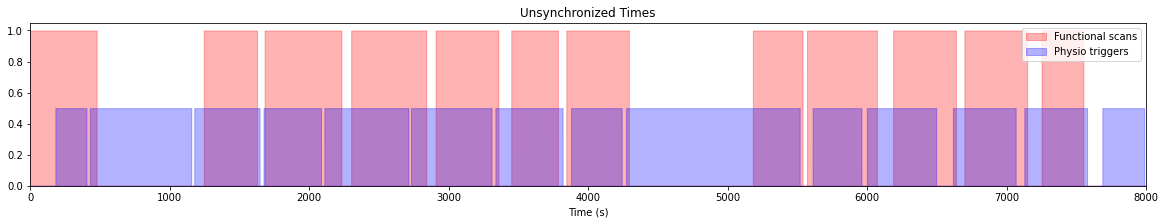

In [4]:
fig, ax = plot_sync(func_df, physio_df, onset_col='onset')
ax.set_title('Unsynchronized Times')
fig.savefig('/Users/tsalo/Documents/Laird_DIVA/timeseries_unsynchronized.png', dpi=400)

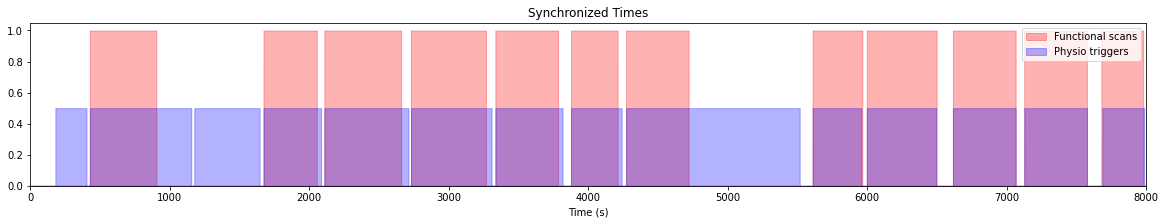

In [5]:
fig, ax = plot_sync(func_df, physio_df, onset_col='phys_onset')
ax.set_title('Synchronized Times')
fig.savefig('/Users/tsalo/Documents/Laird_DIVA/timeseries_synchronized.png', dpi=400)